<a href="https://colab.research.google.com/github/shruti-sharma12/CV-lab/blob/main/cv(expt5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image registration and optimization technique

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.io import imshow

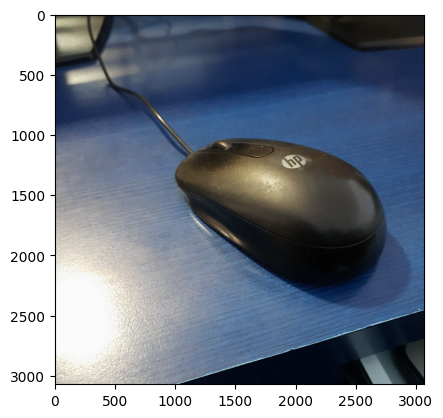

In [23]:
image1=cv2.imread('image1.jpg')
plt.imshow(image1)

In [24]:
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)

In [25]:
image1

array([[ 70,  69,  75, ...,  32,  33,  34],
       [ 70,  70,  75, ...,  34,  34,  35],
       [ 72,  72,  76, ...,  30,  31,  32],
       ...,
       [185, 187, 187, ...,   6,   6,   6],
       [183, 185, 186, ...,   7,   7,   7],
       [186, 187, 187, ...,   7,   6,   6]], dtype=uint8)

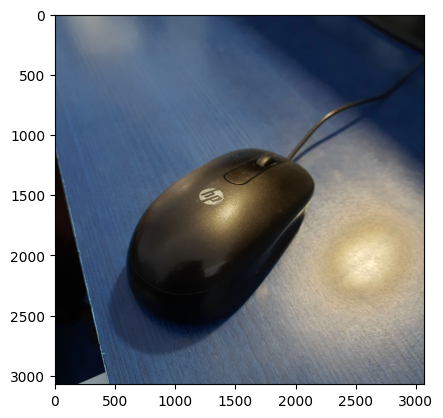

In [26]:
image2=cv2.imread('image2.jpg')
plt.imshow(image2)

In [27]:
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

In [28]:
image2

array([[ 96,  95, 109, ...,  14,  13,  11],
       [ 99,  97, 108, ...,  13,  13,  13],
       [114, 112, 116, ...,  14,  17,  20],
       ...,
       [  2,   3,   6, ..., 122, 115, 115],
       [  7,   7,   9, ..., 118, 110, 111],
       [  6,   6,   9, ..., 115, 108, 109]], dtype=uint8)

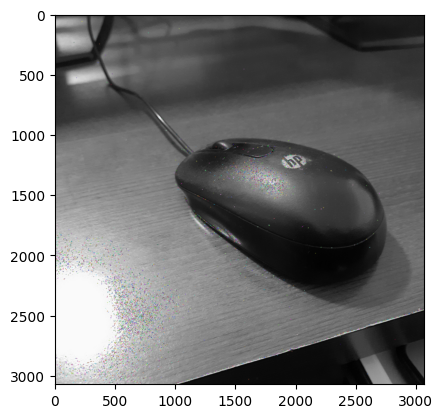

In [29]:
sift= cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(image1,None)
img_1 = cv2.drawKeypoints(image1,keypoints_1,image1)
plt.imshow(img_1)

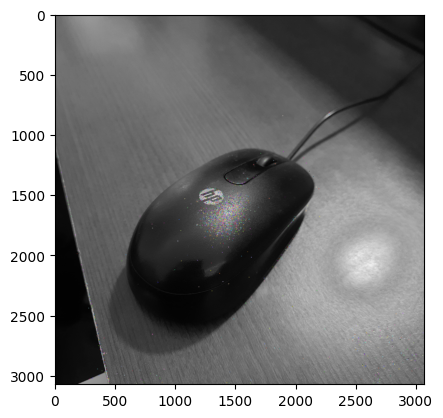

In [30]:
keypoints_2, descriptors_2 = sift.detectAndCompute(image2,None)
img_2 = cv2.drawKeypoints(image2,keypoints_2,image2)
plt.imshow(img_2)

In [31]:
len(keypoints_1),len(keypoints_2)

(6395, 2384)

In [32]:
#Feature matching
bf=cv2.BFMatcher(cv2.NORM_L1,crossCheck=True)
matches=bf.match(descriptors_1,descriptors_2)
matches=sorted(matches, key= lambda x:x.distance)

In [33]:
len(matches)

853

In [34]:
img3=cv2.drawMatches(img_1,keypoints_1,img_2,keypoints_2,matches[:100],img_2,flags=2)

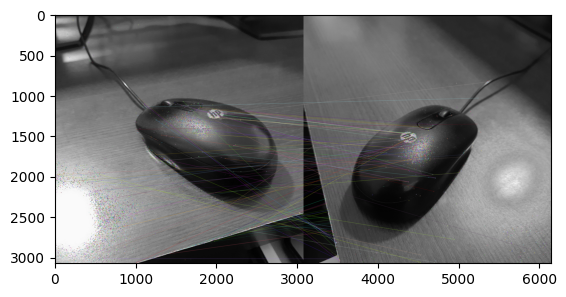

In [35]:
plt.imshow(img3)

In [36]:
#Extract matches keypoints
src_pts=np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
dst_pts=np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

In [69]:
#prespective transformation
M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,70)

In [70]:
M

array([[-4.70263991e+00,  2.30291822e+00,  1.79066673e+03],
       [-5.31408549e+00,  2.66072833e+00,  1.91108111e+03],
       [-3.20552782e-03,  1.67586262e-03,  1.00000000e+00]])

In [71]:
#apply prespective transformation
newImage1 = cv2.warpPerspective(img_1, M, dsize=(img_2.shape[1], img_2.shape[0]))

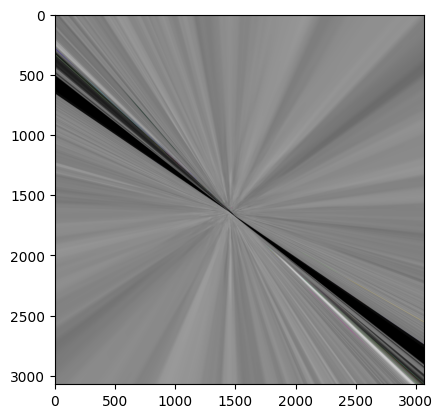

In [72]:
plt.imshow(newImage1)

Text(0.5, 1.0, 'Registered')

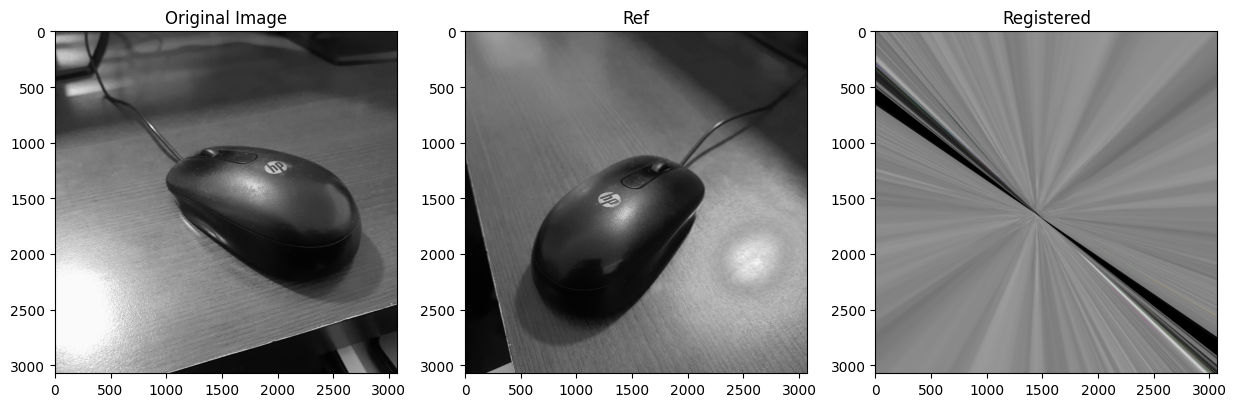

In [73]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title('Ref')

plt.subplot(1, 3, 3)
plt.imshow(newImage1)
plt.title('Registered')
